In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_table('half_moons.txt', header=None)
df.shape

(200, 2)

,0,1
0,0.816805,0.521645
1,1.618596,-0.379829
2,-0.021270,0.273728
3,-1.021810,-0.075440
4,1.766546,-0.170699
...,...,...
195,-0.536334,0.860268
196,1.882817,0.244356
197,0.175752,-0.007231
198,0.124236,1.007902


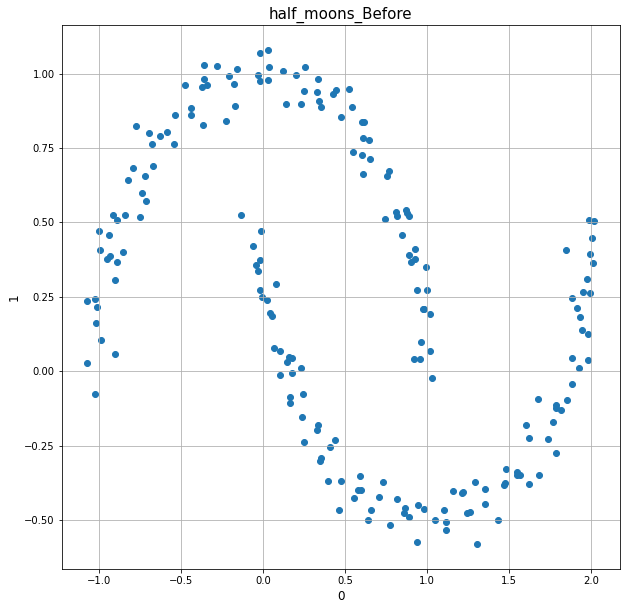

In [23]:
df = pd.read_table('half_moons.txt', header=None)

plt.figure(figsize=(10,10))
plt.title("half_moons_Before", fontsize=15)
plt.scatter(df[0], df[1])
plt.xlabel("0", fontsize=12)
plt.ylabel("1", fontsize=12)
plt.grid()
plt.savefig('half_moons_Before', dpi=300)

df

,0,1,cluster_km
0,0.816805,0.521645,0
1,1.618596,-0.379829,0
2,-0.021270,0.273728,1
3,-1.021810,-0.075440,1
4,1.766546,-0.170699,0
...,...,...,...
195,-0.536334,0.860268,1
196,1.882817,0.244356,0
197,0.175752,-0.007231,1
198,0.124236,1.007902,1


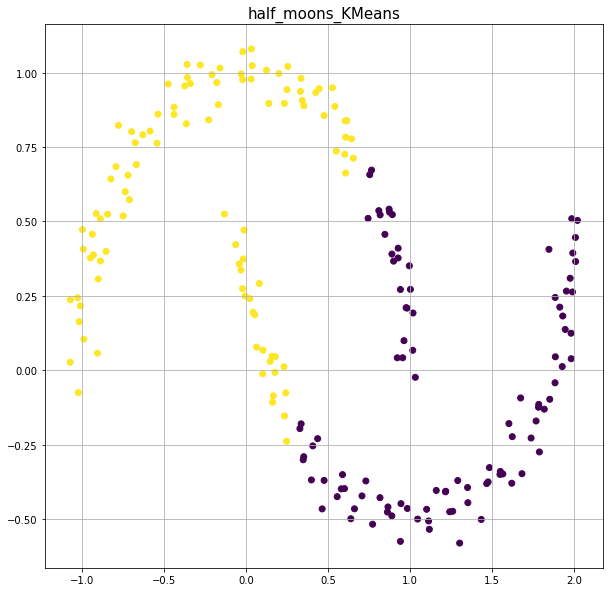

In [24]:
from sklearn.cluster import KMeans

kmeans_ = KMeans(n_clusters=2).fit(df.values)
df['cluster_km'] = kmeans_.labels_

plt.figure(figsize=(10,10))
plt.title("half_moons_KMeans", fontsize=15)
plt.scatter(df[0],df[1],c=df['cluster_km'])
plt.grid()
plt.savefig('half_moons_KMeans', dpi=300)

df


,0,1,cluster_km,cluster_db
0,0.816805,0.521645,0,0
1,1.618596,-0.379829,0,1
2,-0.021270,0.273728,1,2
3,-1.021810,-0.075440,1,3
4,1.766546,-0.170699,0,1
...,...,...,...,...
195,-0.536334,0.860268,1,3
196,1.882817,0.244356,0,1
197,0.175752,-0.007231,1,2
198,0.124236,1.007902,1,3


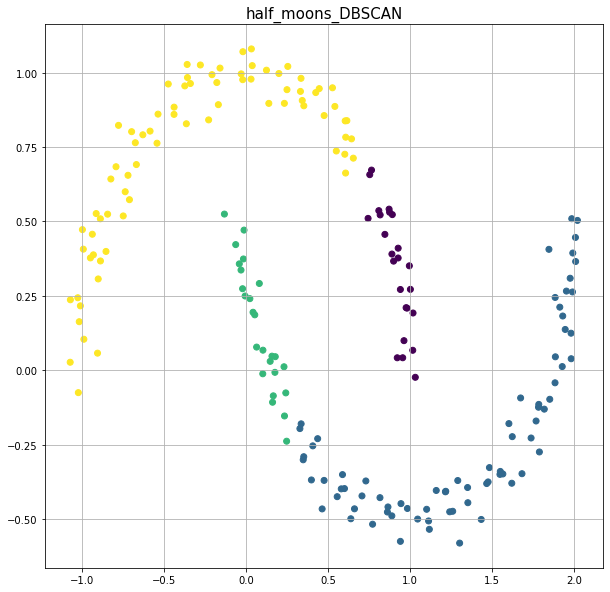

In [25]:
from sklearn.cluster import DBSCAN
db_scan = DBSCAN(eps=0.3, min_samples=5).fit(df.values)
df['cluster_db'] = db_scan.labels_

plt.figure(figsize=(10,10))
plt.title("half_moons_DBSCAN", fontsize=15)
plt.scatter(df[0],df[1],c=df['cluster_db'])
plt.grid()
plt.savefig('half_moons_DBSCAN', dpi=300)

df

In [28]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,10))
plt.title('half_moons_hierarchy_순서도')
dend=shc.dendrogram(shc.linkage(df[[0, 1]],method='ward'))
df[[0, 1]].iloc[:,0]
plt.savefig('half_moons_DBSCAN_hierarchy', dpi=300)

# n개 군집까지 클러스터링 하기
predict=pd.DataFrame(shc.fcluster(shc.linkage(df[[0, 1]],method='ward'),13,criterion='distance'))
predict.columns=['predict']
predict

df = pd.concat([df, predict], axis=1)

plt.figure(figsize=(10,10))
plt.title("half_moons_hierarchy", fontsize=15)
plt.scatter(df[0],df[1],c=df['predict'])
plt.grid()
plt.savefig('half_moons_hierarchy', dpi=300)


C:\Users\Lukaid\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lukaid\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lukaid\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lukaid\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Lukaid\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_tex

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not      predict  predict
0          2        2
1          1        1
2          2        2
3          2        2
4          1        1
..       ...      ...
195        2        2
196        1        1
197        2        2
198        2        2
199        1        1

[200 rows x 2 columns]